<p style="text-align:center">
    <a href="https://ensas.uca.ma/">
    <img src="https://www.ensamaroc.com/storage/images/schools/logos/ENSASafi_logo20230122195830.png" width="300" alt="Ensa"  />
    </a>
</p>


# **Analyse en composantes principales**


**Réalisé par** :    

*   *Abdelhamid CHEBEL*
*   *Hassan BENSALTANA*
*   *Anas HASNA*


<h1>Table des matières</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#understanding-data">Understanding the Data</a></li>
        <li><a href="#reading_data">Reading the Data </a></li>
        <li><a href="#">preprocessing</a></li>
        <li><a href="#">ACP</a></li>
        <li><a href="#">ACP sans utilisation de bibliothèque scikit-learn</a></li>
    </ol>
</div>
<br>
<hr>


In [1]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
import seaborn as sns
%matplotlib inline

<ipython-input-1-c124376f7c40>:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [2]:
from google.colab import files
import pandas as pd

_ = files.upload()

Saving data.xlsx to data.xlsx


In [3]:
df = pd.read_excel('data.xlsx',index_col=0)
df.sample(5)

,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
Cours,,,,,,,,,,
UML,272,4,88.0,20.0,2,18,1.000000,3,160,4055451
probabilités,60,100,NaN,NaN,1,1,NaN,0,89,4525296
NodeJs,412,58,90.0,10.0,2,8,0.333333,3,18,4297211
Oracle,203,44,89.0,8.0,2,7,0.500000,2,186,4467481
statistique,55,4,86.0,12.0,2,21,0.750000,4,8,4525306


<h2 id="understanding_data">Understanding the Data</h2>

In [4]:
df.shape

(19, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, C to Angular
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   inscription          19 non-null     int64  
 1   progression          19 non-null     int64  
 2   moyenneDeClasse      15 non-null     float64
 3   duree                18 non-null     float64
 4   difficulte           19 non-null     int64  
 5   nbChapitres          19 non-null     int64  
 6   ratioQuizEvaluation  16 non-null     float64
 7   nbEvaluations        19 non-null     int64  
 8   derniereMiseAJour    19 non-null     int64  
 9   idCours              19 non-null     int64  
dtypes: float64(3), int64(7)
memory usage: 1.6+ KB


In [6]:
df.drop(columns=['derniereMiseAJour','idCours'], axis=1, inplace=True)

In [7]:
nb_null = df.isnull().sum().sort_values(ascending=False)
nb_null

moyenneDeClasse        4
ratioQuizEvaluation    3
duree                  1
inscription            0
progression            0
difficulte             0
nbChapitres            0
nbEvaluations          0
dtype: int64

In [8]:
_ = round(nb_null/df.isnull().count() * 100,2)
table_null = pd.concat([nb_null,_],axis=1,keys=["total","%"])
table_null

,total,%
moyenneDeClasse,4,21.05
ratioQuizEvaluation,3,15.79
duree,1,5.26
inscription,0,0.00
progression,0,0.00
difficulte,0,0.00
nbChapitres,0,0.00
nbEvaluations,0,0.00


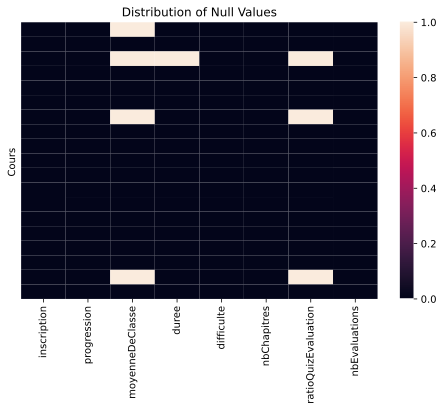

In [9]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.title('Distribution of Null Values')
plt.show()

In [10]:
df.duplicated().sum()

0

In [11]:
mean_values =  {
                "moyenneDeClasse": round(df['moyenneDeClasse'].mean(),2),
                "ratioQuizEvaluation": round(df['ratioQuizEvaluation'].mean(),2),
                "duree": round(df['duree'].mean(),2)
                }
df.fillna(value=mean_values,inplace=True)

In [12]:
# @title check null value
df.isnull().sum()

inscription            0
progression            0
moyenneDeClasse        0
duree                  0
difficulte             0
nbChapitres            0
ratioQuizEvaluation    0
nbEvaluations          0
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
inscription,19.0,235.473684,167.684349,29.0,134.0,195.00,310.50,713.0
progression,19.0,44.052632,36.326412,2.0,4.0,44.00,70.00,100.0
moyenneDeClasse,19.0,89.400000,3.524517,84.0,87.0,89.40,91.50,96.0
duree,19.0,15.000000,10.027739,1.0,9.0,15.00,20.00,40.0
difficulte,19.0,1.894737,0.657836,1.0,1.5,2.00,2.00,3.0
nbChapitres,19.0,15.210526,9.223032,1.0,8.5,13.00,20.50,38.0
ratioQuizEvaluation,19.0,0.617945,0.224616,0.0,0.5,0.62,0.75,1.0
nbEvaluations,19.0,2.947368,1.715086,0.0,2.0,3.00,4.00,7.0


In [14]:
import numpy as np

A = df.values
A[:3]

array([[ 29.        ,  34.        ,  89.4       ,  15.        ,
          3.        ,  11.        ,   0.66666667,   3.        ],
       [ 55.        ,   4.        ,  86.        ,  12.        ,
          2.        ,  21.        ,   0.75      ,   4.        ],
       [ 60.        , 100.        ,  89.4       ,  15.        ,
          1.        ,   1.        ,   0.62      ,   0.        ]])

In [15]:
df.head(3)

,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations
Cours,,,,,,,,
C,29,34,89.4,15.0,3,11,0.666667,3
statistique,55,4,86.0,12.0,2,21,0.750000,4
probabilités,60,100,89.4,15.0,1,1,0.620000,0


In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
A_scaled = sc.fit_transform(A.astype(float))

In [17]:
A_scaled[:3]

array([[-1.26506467e+00, -2.84313717e-01,  4.14248649e-15,
         0.00000000e+00,  1.72618937e+00, -4.69032782e-01,
         2.22855355e-01,  3.15283331e-02],
       [-1.10576261e+00, -1.13278921e+00, -9.91105344e-01,
        -3.07368082e-01,  1.64398987e-01,  6.44920075e-01,
         6.04025136e-01,  6.30566661e-01],
       [-1.07512761e+00,  1.58233236e+00,  4.14248649e-15,
         0.00000000e+00, -1.39739139e+00, -1.58298564e+00,
         9.40027731e-03, -1.76558665e+00]])

In [18]:
pd.DataFrame(A_scaled).describe().round().loc[['mean','std'],:]

,0,1,2,3,4,5,6,7
mean,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [19]:
from sklearn.decomposition import PCA

n_components = 4

pca = PCA(n_components=n_components).fit(A_scaled.round(2))


In [20]:
var = np.round(pca.explained_variance_ratio_*100,2)
var

array([47.12, 15.66, 13.68, 11.93])

In [21]:
scree_cum = var.cumsum().round(2)
scree_cum

array([47.12, 62.78, 76.46, 88.39])

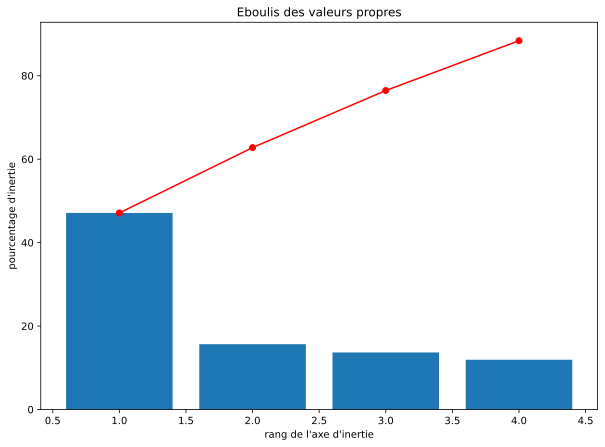

In [22]:
plt.figure(figsize=(10, 7))
plt.bar(np.arange(len(var))+1, var)
plt.plot(np.arange(len(var))+1, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [23]:
pcs = pd.DataFrame(pca.components_).round(2)
pcs.index = [f"F{i}" for i in range(1, pcs.shape[0] + 1)]
pcs.columns = df.columns
pcs.T

,F1,F2,F3,F4
inscription,0.23,0.14,-0.24,0.84
progression,-0.45,-0.09,-0.18,0.17
moyenneDeClasse,-0.08,0.50,0.75,0.00
duree,0.45,-0.12,0.02,-0.00
difficulte,0.33,-0.57,0.09,-0.25
nbChapitres,0.46,0.15,0.00,-0.03
ratioQuizEvaluation,0.08,0.56,-0.57,-0.44
nbEvaluations,0.45,0.21,0.09,0.04


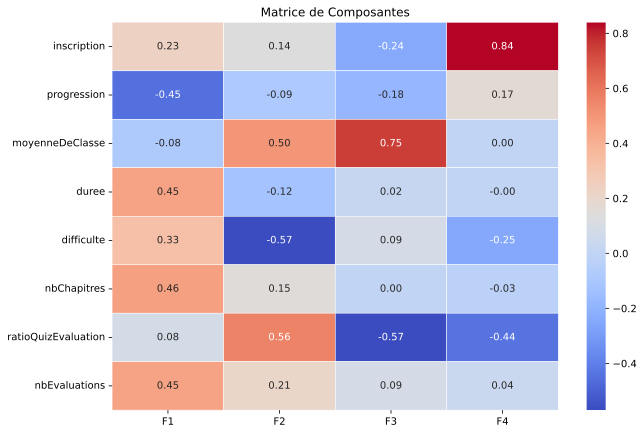

In [24]:
plt.figure(figsize=(10, 7))
sns.heatmap(pcs.T, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

plt.title('Matrice de Composantes')

plt.show()

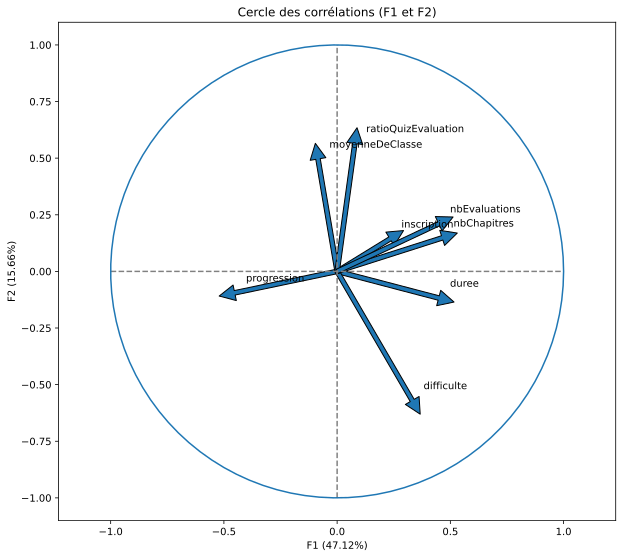

In [25]:
x,y = 0,1
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,0,pca.components_[0, i],
             pca.components_[1, i],
             head_width=0.07,
             head_length=0.07,
             width=0.02)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df.columns[i])

plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


plt.xlabel('F{} ({}%)'.format(x+1, var[0]))
plt.ylabel('F{} ({}%)'.format(y+1, var[1]))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
plt.show(block=False)

In [26]:
X_proj = pca.transform(A_scaled)
X_proj[:5]

array([[ 0.22143288, -1.07584981,  0.38919308, -1.62647978],
       [ 0.88567479, -0.03209839, -0.55087464, -1.43424045],
       [-2.95400247, -0.1084427 , -0.3239558 , -0.30053305],
       [-1.6848827 , -1.11824603,  3.15699572,  0.44203377],
       [-1.87325383,  1.78712728, -0.84520802, -0.9603963 ]])

In [27]:
def display_factorial_planes(   X_projected,
                                x_y,
                                pca=None,
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[15,10],
                                marker="." ):

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On gère les labels
    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    c = None if clusters is None else clusters

    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) :
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()



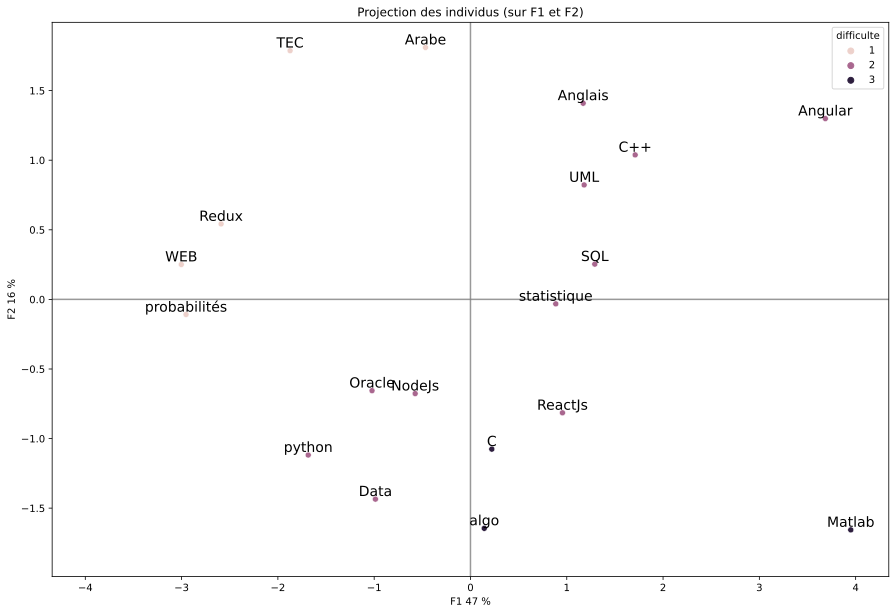

In [28]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=df.index, clusters=df['difficulte'], marker="o")

**ACP sans utilisation de bibliothèque scikit-learn**




In [29]:
def pca(X, num_components):
    X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    covariance_matrix = np.cov(X_standardized, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    top_eigenvectors = eigenvectors[:, :num_components]

    pca_result = np.dot(X_standardized, top_eigenvectors)

    contribution = eigenvalues[:num_components] / np.sum(eigenvalues)

    quality = np.cumsum(contribution)

    return pca_result, top_eigenvectors, contribution, quality

In [30]:
result, principal_components, contribution, quality = pca(A, num_components=2)

In [32]:
print("data shape:", A.shape)
print("data shape after PCA:", result.shape)
print("Principal components:\n", principal_components)
print("Contribution of each principal component:\n", contribution)
print("Quality of representation:\n", quality)

Original data shape: (19, 8)
Resulting data shape after PCA: (19, 2)
Principal components:
 [[-0.23237725  0.14103215]
 [ 0.45307082 -0.09514886]
 [ 0.08448333  0.50226316]
 [-0.44876239 -0.11863806]
 [-0.33133405 -0.5675035 ]
 [-0.46439997  0.14875741]
 [-0.07923493  0.56238702]
 [-0.44774408  0.21034543]]
Contribution of each principal component:
 [0.47149368 0.15656437]
Quality of representation:
 [0.47149368 0.62805805]


In [39]:
result

array([[-0.22074305, -1.06879046],
       [-0.88624054, -0.03452226],
       [ 2.9546718 , -0.11073752],
       [ 1.68877649, -1.09650867],
       [ 1.87368014,  1.78454028],
       [-1.28954514,  0.26135974],
       [ 3.00470915,  0.24830437],
       [ 0.98945536, -1.44189578],
       [-0.14069183, -1.64847485],
       [-1.16987107,  1.42008497],
       [ 1.02467984, -0.65352158],
       [-1.70999325,  1.04493759],
       [ 0.46871349,  1.81054188],
       [-1.18096727,  0.8159451 ],
       [-3.94779212, -1.66135324],
       [-0.95173351, -0.82318422],
       [ 0.57963273, -0.67465238],
       [ 2.59317081,  0.53606844],
       [-3.67991206,  1.29185859]])

In [37]:
pcs = pd.DataFrame(principal_components).round(2)
pcs

,0,1
0,-0.23,0.14
1,0.45,-0.10
2,0.08,0.50
3,-0.45,-0.12
4,-0.33,-0.57
5,-0.46,0.15
6,-0.08,0.56
7,-0.45,0.21
